# **Ola hayajneh 150976** 
# **Raneem Alruosan 150873**

# import packages 

In [1]:
import pandas as pd
from os import listdir
import numpy as np
from termcolor import colored
from scipy.stats import wilcoxon
from statsmodels.stats._knockoff import RegressionFDR
from scipy import stats
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install statsmodels
!pip install scikit-posthocs

     |████████████████████████████████| 43 kB 901 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=d40f2d6cbcf70777720ff66c6b5d0930beca744426f2e08b411d9ff739ddbddd
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


In [4]:
import scikit_posthocs as sp
import statsmodels.stats.multitest as smt

# Unzip 10D files

In [74]:
!unrar x "/content/drive/MyDrive/algo1_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo1_10D.rar

Creating    /content/10d/algo1_10D                                    OK
Extracting  /content/10d/algo1_10D/b3e3pbest_10_10.txt                     4%  OK 
Extracting  /content/10d/algo1_10D/b3e3pbest_11_10.txt                     7%  OK 
Extracting  /content/10d/algo1_10D/b3e3pbest_12_10.txt                    11%  OK 
Extracting  /content/10d/algo1_10D/b3e3pbest_13_10.txt                    13%  OK 
Extracting  /content/10d/algo1_10D/b3e3pbest_14_10.txt                    16%  OK 
Extracting  /content/10d/algo1_10D/b3e3pbest_15_10.txt                    20%  OK 
Extracting  /content/10d/algo1_10D/b3e3pbest_16_10.txt                    23%  OK 
Extracting  /content/10d/algo1_10D/b3e3pbest_17_10.txt                    27%  OK 
Extracting  /content/10d/algo1_10D/b3e3pbest_18_10.txt              

In [75]:
!unrar x "/content/drive/MyDrive/algo2_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo2_10D.rar

Creating    /content/10d/algo2_10D                                    OK
Extracting  /content/10d/algo2_10D/CMLSP_10_10.txt                         2%  OK 
Extracting  /content/10d/algo2_10D/CMLSP_11_10.txt                         5%  OK 
Extracting  /content/10d/algo2_10D/CMLSP_12_10.txt                         8%  OK 
Extracting  /content/10d/algo2_10D/CMLSP_13_10.txt                        11%  OK 
Extracting  /content/10d/algo2_10D/CMLSP_14_10.txt                        14%  OK 
Extracting  /content/10d/algo2_10D/CMLSP_15_10.txt                        17%  OK 
Extracting  /content/10d/algo2_10D/CMLSP_16_10.txt                        20%  OK 
Extracting  /content/10d/algo2_10D/CMLSP_17_10.txt                        23%  OK 
Extracting  /content/10d/algo2_10D/CMLSP_18_10.txt                  

In [76]:
!unrar x "/content/drive/MyDrive/algo3_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo3_10D.rar

Creating    /content/10d/algo3_10D                                    OK
Extracting  /content/10d/algo3_10D/DE_b6e6rlwithrestart_f10_D10_NP50_Runs51.txt       3%  OK 
Extracting  /content/10d/algo3_10D/DE_b6e6rlwithrestart_f11_D10_NP50_Runs51.txt       7%  OK 
Extracting  /content/10d/algo3_10D/DE_b6e6rlwithrestart_f12_D10_NP50_Runs51.txt      10%  OK 
Extracting  /content/10d/algo3_10D/DE_b6e6rlwithrestart_f13_D10_NP50_Runs51.txt      13%  OK 
Extracting  /content/10d/algo3_10D/DE_b6e6rlwithrestart_f14_D10_NP50_Runs51.txt      16%  OK 
Extracting  /content/10d/algo3_10D/DE_b6e6rlwithrestart_f15_D10_NP50_Runs51.txt      20%  OK 
Extracting  /content/10d/algo3_10D/DE_b6e6rlwithrestart_f16_D10_NP50_Runs51.txt      24%  OK 
Extracting  /content/10d/algo3_10D/DE_b6e6rlwithrestart_f17_D10_NP50_Runs51.txt    

In [77]:
!unrar x "/content/drive/MyDrive/algo4_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo4_10D.rar

Creating    /content/10d/algo4_10D                                    OK
Extracting  /content/10d/algo4_10D/UMOEAS_10_10.txt                        3%  OK 
Extracting  /content/10d/algo4_10D/UMOEAS_11_10.txt                        6%  OK 
Extracting  /content/10d/algo4_10D/UMOEAS_12_10.txt                        9%  OK 
Extracting  /content/10d/algo4_10D/UMOEAS_13_10.txt                       13%  OK 
Extracting  /content/10d/algo4_10D/UMOEAS_14_10.txt                       18%  OK 
Extracting  /content/10d/algo4_10D/UMOEAS_15_10.txt                       21%  OK 
Extracting  /content/10d/algo4_10D/UMOEAS_16_10.txt                       25%  OK 
Extracting  /content/10d/algo4_10D/UMOEAS_17_10.txt                       29%  OK 
Extracting  /content/10d/algo4_10D/UMOEAS_18_10.txt                 

In [78]:
!unrar x "/content/drive/MyDrive/algo5_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo5_10D.rar

Creating    /content/10d/algo5_10D                                    OK
Extracting  /content/10d/algo5_10D/FERDE_10_10.txt                         2%  OK 
Extracting  /content/10d/algo5_10D/FERDE_11_10.txt                         5%  OK 
Extracting  /content/10d/algo5_10D/FERDE_12_10.txt                         8%  OK 
Extracting  /content/10d/algo5_10D/FERDE_13_10.txt                        10%  OK 
Extracting  /content/10d/algo5_10D/FERDE_14_10.txt                        13%  OK 
Extracting  /content/10d/algo5_10D/FERDE_15_10.txt                        16%  OK 
Extracting  /content/10d/algo5_10D/FERDE_16_10.txt                        19%  OK 
Extracting  /content/10d/algo5_10D/FERDE_17_10.txt                        22%  OK 
Extracting  /content/10d/algo5_10D/FERDE_18_10.txt                  

In [79]:
!unrar x "/content/drive/MyDrive/algo6_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo6_10D.rar

Creating    /content/10d/algo6_10D                                    OK
Extracting  /content/10d/algo6_10D/FERDE_10_10.txt                         2%  OK 
Extracting  /content/10d/algo6_10D/FERDE_11_10.txt                         5%  OK 
Extracting  /content/10d/algo6_10D/FERDE_12_10.txt                         9%  OK 
Extracting  /content/10d/algo6_10D/FERDE_13_10.txt                        11%  OK 
Extracting  /content/10d/algo6_10D/FERDE_14_10.txt                        15%  OK 
Extracting  /content/10d/algo6_10D/FERDE_15_10.txt                        18%  OK 
Extracting  /content/10d/algo6_10D/FERDE_16_10.txt                        21%  OK 
Extracting  /content/10d/algo6_10D/FERDE_17_10.txt                        25%  OK 
Extracting  /content/10d/algo6_10D/FERDE_18_10.txt                  

In [80]:
!unrar x "/content/drive/MyDrive/algo7_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo7_10D.rar

Creating    /content/10d/algo7_10D                                    OK
Extracting  /content/10d/algo7_10D/GaAPADE_10_10.txt                       4%  OK 
Extracting  /content/10d/algo7_10D/GaAPADE_11_10.txt                       8%  OK 
Extracting  /content/10d/algo7_10D/GaAPADE_12_10.txt                      11%  OK 
Extracting  /content/10d/algo7_10D/GaAPADE_13_10.txt                      14%  OK 
Extracting  /content/10d/algo7_10D/GaAPADE_14_10.txt                      17%  OK 
Extracting  /content/10d/algo7_10D/GaAPADE_15_10.txt                      22%  OK 
Extracting  /content/10d/algo7_10D/GaAPADE_16_10.txt                      25%  OK 
Extracting  /content/10d/algo7_10D/GaAPADE_17_10.txt                      29%  OK 
Extracting  /content/10d/algo7_10D/GaAPADE_18_10.txt                

In [81]:
!unrar x "/content/drive/MyDrive/algo8_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo8_10D.rar

Creating    /content/10d/algo8_10D                                    OK
Extracting  /content/10d/algo8_10D/L-SHADE_10_10.txt                       3%  OK 
Extracting  /content/10d/algo8_10D/L-SHADE_11_10.txt                       7%  OK 
Extracting  /content/10d/algo8_10D/L-SHADE_12_10.txt                      10%  OK 
Extracting  /content/10d/algo8_10D/L-SHADE_13_10.txt                      14%  OK 
Extracting  /content/10d/algo8_10D/L-SHADE_14_10.txt                      17%  OK 
Extracting  /content/10d/algo8_10D/L-SHADE_15_10.txt                      22%  OK 
Extracting  /content/10d/algo8_10D/L-SHADE_16_10.txt                      25%  OK 
Extracting  /content/10d/algo8_10D/L-SHADE_17_10.txt                      29%  OK 
Extracting  /content/10d/algo8_10D/L-SHADE_18_10.txt                

In [82]:
!unrar x "/content/drive/MyDrive/algo9_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo9_10D.rar

Creating    /content/10d/algo9_10D                                    OK
Extracting  /content/10d/algo9_10D/mvmo_10_10.txt                          3%  OK 
Extracting  /content/10d/algo9_10D/mvmo_11_10.txt                          6%  OK 
Extracting  /content/10d/algo9_10D/mvmo_12_10.txt                          9%  OK 
Extracting  /content/10d/algo9_10D/mvmo_13_10.txt                         13%  OK 
Extracting  /content/10d/algo9_10D/mvmo_14_10.txt                         16%  OK 
Extracting  /content/10d/algo9_10D/mvmo_15_10.txt                         19%  OK 
Extracting  /content/10d/algo9_10D/mvmo_16_10.txt                         23%  OK 
Extracting  /content/10d/algo9_10D/mvmo_17_10.txt                         26%  OK 
Extracting  /content/10d/algo9_10D/mvmo_18_10.txt                   

In [83]:
!unrar x "/content/drive/MyDrive/algo10_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo10_10D.rar

Creating    /content/10d/algo10_10D                                   OK
Extracting  /content/10d/algo10_10D/NRGA_10_10.txt                         3%  OK 
Extracting  /content/10d/algo10_10D/NRGA_11_10.txt                         6%  OK 
Extracting  /content/10d/algo10_10D/NRGA_12_10.txt                         8%  OK 
Extracting  /content/10d/algo10_10D/NRGA_13_10.txt                        11%  OK 
Extracting  /content/10d/algo10_10D/NRGA_14_10.txt                        13%  OK 
Extracting  /content/10d/algo10_10D/NRGA_15_10.txt                        17%  OK 
Extracting  /content/10d/algo10_10D/NRGA_16_10.txt                        20%  OK 
Extracting  /content/10d/algo10_10D/NRGA_17_10.txt                        25%  OK 
Extracting  /content/10d/algo10_10D/NRGA_18_10.txt                 

In [84]:
!unrar x "/content/drive/MyDrive/algo11_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo11_10D.rar

Creating    /content/10d/algo11_10D                                   OK
Extracting  /content/10d/algo11_10D/OptBees_10_10.txt                      2%  OK 
Extracting  /content/10d/algo11_10D/OptBees_11_10.txt                      4%  OK 
Extracting  /content/10d/algo11_10D/OptBees_12_10.txt                      7%  OK 
Extracting  /content/10d/algo11_10D/OptBees_13_10.txt                      9%  OK 
Extracting  /content/10d/algo11_10D/OptBees_14_10.txt                     11%  OK 
Extracting  /content/10d/algo11_10D/OptBees_15_10.txt                     15%  OK 
Extracting  /content/10d/algo11_10D/OptBees_16_10.txt                     20%  OK 
Extracting  /content/10d/algo11_10D/OptBees_17_10.txt                     26%  OK 
Extracting  /content/10d/algo11_10D/OptBees_18_10.txt              

In [85]:
!unrar x "/content/drive/MyDrive/algo12_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo12_10D.rar

Creating    /content/10d/algo12_10D                                   OK
Extracting  /content/10d/algo12_10D/FCDE_10_10.txt                         2%  OK 
Extracting  /content/10d/algo12_10D/FCDE_11_10.txt                         4%  OK 
Extracting  /content/10d/algo12_10D/FCDE_12_10.txt                         6%  OK 
Extracting  /content/10d/algo12_10D/FCDE_13_10.txt                         8%  OK 
Extracting  /content/10d/algo12_10D/FCDE_14_10.txt                         9%  OK 
Extracting  /content/10d/algo12_10D/FCDE_15_10.txt                        12%  OK 
Extracting  /content/10d/algo12_10D/FCDE_16_10.txt                        14%  OK 
Extracting  /content/10d/algo12_10D/FCDE_17_10.txt                        16%  OK 
Extracting  /content/10d/algo12_10D/FCDE_18_10.txt                 

In [86]:
!unrar x "/content/drive/MyDrive/algo13_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo13_10D.rar

Creating    /content/10d/algo13_10D                                   OK
Extracting  /content/10d/algo13_10D/rmalschcma_10_10.txt                   3%  OK 
Extracting  /content/10d/algo13_10D/rmalschcma_11_10.txt                   6%  OK 
Extracting  /content/10d/algo13_10D/rmalschcma_12_10.txt                   9%  OK 
Extracting  /content/10d/algo13_10D/rmalschcma_13_10.txt                  13%  OK 
Extracting  /content/10d/algo13_10D/rmalschcma_14_10.txt                  17%  OK 
Extracting  /content/10d/algo13_10D/rmalschcma_15_10.txt                  21%  OK 
Extracting  /content/10d/algo13_10D/rmalschcma_16_10.txt                  25%  OK 
Extracting  /content/10d/algo13_10D/rmalschcma_17_10.txt                  30%  OK 
Extracting  /content/10d/algo13_10D/rmalschcma_18_10.txt           

In [87]:
!unrar x "/content/drive/MyDrive/algo14_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo14_10D.rar

Creating    /content/10d/algo14_10D                                   OK
Extracting  /content/10d/algo14_10D/RSDE_10_10.txt                         4%  OK 
Extracting  /content/10d/algo14_10D/RSDE_11_10.txt                         8%  OK 
Extracting  /content/10d/algo14_10D/RSDE_12_10.txt                        11%  OK 
Extracting  /content/10d/algo14_10D/RSDE_13_10.txt                        14%  OK 
Extracting  /content/10d/algo14_10D/RSDE_14_10.txt                        17%  OK 
Extracting  /content/10d/algo14_10D/RSDE_15_10.txt                        19%  OK 
Extracting  /content/10d/algo14_10D/RSDE_16_10.txt                        23%  OK 
Extracting  /content/10d/algo14_10D/RSDE_17_10.txt                        28%  OK 
Extracting  /content/10d/algo14_10D/RSDE_18_10.txt                 

In [88]:
!unrar x "/content/drive/MyDrive/algo15_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo15_10D.rar

Creating    /content/10d/algo15_10D                                   OK
Extracting  /content/10d/algo15_10D/FWA-DM_10_10.txt                       2%  OK 
Extracting  /content/10d/algo15_10D/FWA-DM_11_10.txt                       5%  OK 
Extracting  /content/10d/algo15_10D/FWA-DM_12_10.txt                       9%  OK 
Extracting  /content/10d/algo15_10D/FWA-DM_13_10.txt                      12%  OK 
Extracting  /content/10d/algo15_10D/FWA-DM_14_10.txt                      15%  OK 
Extracting  /content/10d/algo15_10D/FWA-DM_15_10.txt                      19%  OK 
Extracting  /content/10d/algo15_10D/FWA-DM_16_10.txt                      23%  OK 
Extracting  /content/10d/algo15_10D/FWA-DM_17_10.txt                      27%  OK 
Extracting  /content/10d/algo15_10D/FWA-DM_18_10.txt               

In [89]:
!unrar x "/content/drive/MyDrive/algo16_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo16_10D.rar

Creating    /content/10d/algo16_10D                                   OK
Extracting  /content/10d/algo16_10D/SOO_10_10.txt                          2%  OK 
Extracting  /content/10d/algo16_10D/SOO_11_10.txt                          5%  OK 
Extracting  /content/10d/algo16_10D/SOO_12_10.txt                          9%  OK 
Extracting  /content/10d/algo16_10D/SOO_13_10.txt                         13%  OK 
Extracting  /content/10d/algo16_10D/SOO_14_10.txt                         17%  OK 
Extracting  /content/10d/algo16_10D/SOO_15_10.txt                         21%  OK 
Extracting  /content/10d/algo16_10D/SOO_16_10.txt                         24%  OK 
Extracting  /content/10d/algo16_10D/SOO_17_10.txt                         27%  OK 
Extracting  /content/10d/algo16_10D/SOO_18_10.txt                  

In [90]:
!unrar x "/content/drive/MyDrive/algo17_10D.rar" "/content/10d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo17_10D.rar

Creating    /content/10d/algo17_10D                                   OK
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_10_10.txt                   1%  OK 
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_11_10.txt                   4%  OK 
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_12_10.txt                   8%  OK 
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_13_10.txt                  12%  OK 
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_14_10.txt                  16%  OK 
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_15_10.txt                  19%  OK 
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_16_10.txt                  23%  OK 
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_17_10.txt                  26%  OK 
Extracting  /content/10d/algo17_10D/SOO+BOBYQA_18_10.txt           

# Unzip 30D files

In [30]:
!unrar x "/content/drive/MyDrive/algo1_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo1_30D.rar
No such file or directory
No files to extract


In [31]:
!unrar x "/content/drive/MyDrive/algo2_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo2_30D.rar
No such file or directory
No files to extract


In [32]:
!unrar x "/content/drive/MyDrive/algo3_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo3_30D.rar
No such file or directory
No files to extract


In [33]:
!unrar x "/content/drive/MyDrive/algo4_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo4_30D.rar
No such file or directory
No files to extract


In [34]:
!unrar x "/content/drive/MyDrive/algo5_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo5_30D.rar
No such file or directory
No files to extract


In [35]:
!unrar x "/content/drive/MyDrive/algo6_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo6_30D.rar
No such file or directory
No files to extract


In [36]:
!unrar x "/content/drive/MyDrive/algo7_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo7_30D.rar
No such file or directory
No files to extract


In [37]:
!unrar x "/content/drive/MyDrive/algo8_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo8_30D.rar
No such file or directory
No files to extract


In [38]:
!unrar x "/content/drive/MyDrive/algo9_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo9_30D.rar
No such file or directory
No files to extract


In [39]:
!unrar x "/content/drive/MyDrive/algo10_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo10_30D.rar
No such file or directory
No files to extract


In [40]:
!unrar x "/content/drive/MyDrive/algo11_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo11_30D.rar
No such file or directory
No files to extract


In [41]:
!unrar x "/content/drive/MyDrive/algo12_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo12_30D.rar
No such file or directory
No files to extract


In [42]:
!unrar x "/content/drive/MyDrive/algo13_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo13_30D.rar
No such file or directory
No files to extract


In [43]:
!unrar x "/content/drive/MyDrive/algo14_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo14_30D.rar
No such file or directory
No files to extract


In [44]:
!unrar x "/content/drive/MyDrive/algo15_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo15_30D.rar
No such file or directory
No files to extract


In [45]:
!unrar x "/content/drive/MyDrive/algo16_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo16_30D.rar
No such file or directory
No files to extract


In [46]:
!unrar x "/content/drive/MyDrive/algo17_30D.rar" "/content/30d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/drive/MyDrive/algo17_30D.rar
No such file or directory
No files to extract


# Unzip 50D files

In [ ]:
!unrar x "/content/drive/MyDrive/algo1_50D.rar" "/content/50d"

In [48]:
!unrar x "/content/drive/MyDrive/algo2_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo2_50D.rar

Creating    /content/50d/algo2_50D                                    OK
Extracting  /content/50d/algo2_50D/CMLSP_10_50.txt                         2%  OK 
Extracting  /content/50d/algo2_50D/CMLSP_11_50.txt                         5%  OK 
Extracting  /content/50d/algo2_50D/CMLSP_12_50.txt                         9%  OK 
Extracting  /content/50d/algo2_50D/CMLSP_13_50.txt                        13%  OK 
Extracting  /content/50d/algo2_50D/CMLSP_14_50.txt                        16%  OK 
Extracting  /content/50d/algo2_50D/CMLSP_15_50.txt                        19%  OK 
Extracting  /content/50d/algo2_50D/CMLSP_16_50.txt                        22%  OK 
Extracting  /content/50d/algo2_50D/CMLSP_17_50.txt                        25%  OK 
Extracting  /content/50d/algo2_50D/CMLSP_18_50.txt                  

In [49]:
!unrar x "/content/drive/MyDrive/algo3_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo3_50D.rar

Creating    /content/50d/algo3_50D                                    OK
Extracting  /content/50d/algo3_50D/DE_b6e6rlwithrestart_f10_D50_NP50_Runs51.txt       2%  OK 
Extracting  /content/50d/algo3_50D/DE_b6e6rlwithrestart_f11_D50_NP50_Runs51.txt       6%  OK 
Extracting  /content/50d/algo3_50D/DE_b6e6rlwithrestart_f12_D50_NP50_Runs51.txt      10%  OK 
Extracting  /content/50d/algo3_50D/DE_b6e6rlwithrestart_f13_D50_NP50_Runs51.txt      12%  OK 
Extracting  /content/50d/algo3_50D/DE_b6e6rlwithrestart_f14_D50_NP50_Runs51.txt      14%  OK 
Extracting  /content/50d/algo3_50D/DE_b6e6rlwithrestart_f15_D50_NP50_Runs51.txt      18%  OK 
Extracting  /content/50d/algo3_50D/DE_b6e6rlwithrestart_f16_D50_NP50_Runs51.txt      21%  OK 
Extracting  /content/50d/algo3_50D/DE_b6e6rlwithrestart_f17_D50_NP50_Runs51.txt    

In [50]:
!unrar x "/content/drive/MyDrive/algo4_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo4_50D.rar

Creating    /content/50d/algo4_50D                                    OK
Extracting  /content/50d/algo4_50D/UMOEAS_10_50.txt                        3%  OK 
Extracting  /content/50d/algo4_50D/UMOEAS_11_50.txt                        5%  OK 
Extracting  /content/50d/algo4_50D/UMOEAS_12_50.txt                        9%  OK 
Extracting  /content/50d/algo4_50D/UMOEAS_13_50.txt                       12%  OK 
Extracting  /content/50d/algo4_50D/UMOEAS_14_50.txt                       15%  OK 
Extracting  /content/50d/algo4_50D/UMOEAS_15_50.txt                       18%  OK 
Extracting  /content/50d/algo4_50D/UMOEAS_16_50.txt                       22%  OK 
Extracting  /content/50d/algo4_50D/UMOEAS_17_50.txt                       26%  OK 
Extracting  /content/50d/algo4_50D/UMOEAS_18_50.txt                 

In [51]:
!unrar x "/content/drive/MyDrive/algo5_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo5_50D.rar

Creating    /content/50d/algo5_50D                                    OK
Extracting  /content/50d/algo5_50D/POBL_ADE_10_50.txt                      3%  OK 
Extracting  /content/50d/algo5_50D/POBL_ADE_11_50.txt                      6%  OK 
Extracting  /content/50d/algo5_50D/POBL_ADE_12_50.txt                      9%  OK 
Extracting  /content/50d/algo5_50D/POBL_ADE_13_50.txt                     12%  OK 
Extracting  /content/50d/algo5_50D/POBL_ADE_14_50.txt                     14%  OK 
Extracting  /content/50d/algo5_50D/POBL_ADE_15_50.txt                     18%  OK 
Extracting  /content/50d/algo5_50D/POBL_ADE_16_50.txt                     21%  OK 
Extracting  /content/50d/algo5_50D/POBL_ADE_17_50.txt                     25%  OK 
Extracting  /content/50d/algo5_50D/POBL_ADE_18_50.txt               

In [52]:
!unrar x "/content/drive/MyDrive/algo6_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo6_50D.rar

Creating    /content/50d/algo6_50D                                    OK
Extracting  /content/50d/algo6_50D/FERDE_10_50.txt                         3%  OK 
Extracting  /content/50d/algo6_50D/FERDE_11_50.txt                         5%  OK 
Extracting  /content/50d/algo6_50D/FERDE_12_50.txt                         9%  OK 
Extracting  /content/50d/algo6_50D/FERDE_13_50.txt                        11%  OK 
Extracting  /content/50d/algo6_50D/FERDE_14_50.txt                        14%  OK 
Extracting  /content/50d/algo6_50D/FERDE_15_50.txt                        18%  OK 
Extracting  /content/50d/algo6_50D/FERDE_16_50.txt                        22%  OK 
Extracting  /content/50d/algo6_50D/FERDE_17_50.txt                        26%  OK 
Extracting  /content/50d/algo6_50D/FERDE_18_50.txt                  

In [53]:
!unrar x "/content/drive/MyDrive/algo7_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo7_50D.rar

Creating    /content/50d/algo7_50D                                    OK
Extracting  /content/50d/algo7_50D/GaAPADE_10_50.txt                       4%  OK 
Extracting  /content/50d/algo7_50D/GaAPADE_11_50.txt                       7%  OK 
Extracting  /content/50d/algo7_50D/GaAPADE_12_50.txt                      11%  OK 
Extracting  /content/50d/algo7_50D/GaAPADE_13_50.txt                      14%  OK 
Extracting  /content/50d/algo7_50D/GaAPADE_14_50.txt                      18%  OK 
Extracting  /content/50d/algo7_50D/GaAPADE_15_50.txt                      22%  OK 
Extracting  /content/50d/algo7_50D/GaAPADE_16_50.txt                      25%  OK 
Extracting  /content/50d/algo7_50D/GaAPADE_17_50.txt                      29%  OK 
Extracting  /content/50d/algo7_50D/GaAPADE_18_50.txt                

In [54]:
!unrar x "/content/drive/MyDrive/algo8_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo8_50D.rar

Creating    /content/50d/algo8_50D                                    OK
Extracting  /content/50d/algo8_50D/L-SHADE_10_50.txt                       3%  OK 
Extracting  /content/50d/algo8_50D/L-SHADE_11_50.txt                       6%  OK 
Extracting  /content/50d/algo8_50D/L-SHADE_12_50.txt                      10%  OK 
Extracting  /content/50d/algo8_50D/L-SHADE_13_50.txt                      13%  OK 
Extracting  /content/50d/algo8_50D/L-SHADE_14_50.txt                      16%  OK 
Extracting  /content/50d/algo8_50D/L-SHADE_15_50.txt                      20%  OK 
Extracting  /content/50d/algo8_50D/L-SHADE_16_50.txt                      23%  OK 
Extracting  /content/50d/algo8_50D/L-SHADE_17_50.txt                      27%  OK 
Extracting  /content/50d/algo8_50D/L-SHADE_18_50.txt                

In [55]:
!unrar x "/content/drive/MyDrive/algo9_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo9_50D.rar

Creating    /content/50d/algo9_50D                                    OK
Extracting  /content/50d/algo9_50D/mvmo_10_50.txt                          3%  OK 
Extracting  /content/50d/algo9_50D/mvmo_11_50.txt                          6%  OK 
Extracting  /content/50d/algo9_50D/mvmo_12_50.txt                         10%  OK 
Extracting  /content/50d/algo9_50D/mvmo_13_50.txt                         13%  OK 
Extracting  /content/50d/algo9_50D/mvmo_14_50.txt                         16%  OK 
Extracting  /content/50d/algo9_50D/mvmo_15_50.txt                         20%  OK 
Extracting  /content/50d/algo9_50D/mvmo_16_50.txt                         22%  OK 
Extracting  /content/50d/algo9_50D/mvmo_17_50.txt                         26%  OK 
Extracting  /content/50d/algo9_50D/mvmo_18_50.txt                   

In [56]:
!unrar x "/content/drive/MyDrive/algo10_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo10_50D.rar

Creating    /content/50d/algo10_50D                                   OK
Extracting  /content/50d/algo10_50D/NRGA_10_50.txt                         3%  OK 
Extracting  /content/50d/algo10_50D/NRGA_11_50.txt                         7%  OK 
Extracting  /content/50d/algo10_50D/NRGA_12_50.txt                         9%  OK 
Extracting  /content/50d/algo10_50D/NRGA_13_50.txt                        11%  OK 
Extracting  /content/50d/algo10_50D/NRGA_14_50.txt                        13%  OK 
Extracting  /content/50d/algo10_50D/NRGA_15_50.txt                        17%  OK 
Extracting  /content/50d/algo10_50D/NRGA_16_50.txt                        20%  OK 
Extracting  /content/50d/algo10_50D/NRGA_17_50.txt                        24%  OK 
Extracting  /content/50d/algo10_50D/NRGA_18_50.txt                 

In [57]:
!unrar x "/content/drive/MyDrive/algo11_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo11_50D.rar

Creating    /content/50d/algo11_50D                                   OK
Extracting  /content/50d/algo11_50D/OptBees_10_50.txt                      3%  OK 
Extracting  /content/50d/algo11_50D/OptBees_11_50.txt                      5%  OK 
Extracting  /content/50d/algo11_50D/OptBees_12_50.txt                      7%  OK 
Extracting  /content/50d/algo11_50D/OptBees_13_50.txt                      8%  OK 
Extracting  /content/50d/algo11_50D/OptBees_14_50.txt                     10%  OK 
Extracting  /content/50d/algo11_50D/OptBees_15_50.txt                     15%  OK 
Extracting  /content/50d/algo11_50D/OptBees_16_50.txt                     18%  OK 
Extracting  /content/50d/algo11_50D/OptBees_17_50.txt                     24%  OK 
Extracting  /content/50d/algo11_50D/OptBees_18_50.txt              

In [58]:
!unrar x "/content/drive/MyDrive/algo12_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo12_50D.rar

Creating    /content/50d/algo12_50D                                   OK
Extracting  /content/50d/algo12_50D/FCDE_10_50.txt                         3%  OK 
Extracting  /content/50d/algo12_50D/FCDE_11_50.txt                         6%  OK 
Extracting  /content/50d/algo12_50D/FCDE_12_50.txt                         9%  OK 
Extracting  /content/50d/algo12_50D/FCDE_13_50.txt                        11%  OK 
Extracting  /content/50d/algo12_50D/FCDE_14_50.txt                        13%  OK 
Extracting  /content/50d/algo12_50D/FCDE_15_50.txt                        17%  OK 
Extracting  /content/50d/algo12_50D/FCDE_16_50.txt                        20%  OK 
Extracting  /content/50d/algo12_50D/FCDE_17_50.txt                        24%  OK 
Extracting  /content/50d/algo12_50D/FCDE_18_50.txt                 

In [59]:
!unrar x "/content/drive/MyDrive/algo13_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo13_50D.rar

Creating    /content/50d/algo13_50D                                   OK
Extracting  /content/50d/algo13_50D/rmalschcma_10_50.txt                   3%  OK 
Extracting  /content/50d/algo13_50D/rmalschcma_11_50.txt                   5%  OK 
Extracting  /content/50d/algo13_50D/rmalschcma_12_50.txt                   7%  OK 
Extracting  /content/50d/algo13_50D/rmalschcma_13_50.txt                  11%  OK 
Extracting  /content/50d/algo13_50D/rmalschcma_14_50.txt                  14%  OK 
Extracting  /content/50d/algo13_50D/rmalschcma_15_50.txt                  18%  OK 
Extracting  /content/50d/algo13_50D/rmalschcma_16_50.txt                  21%  OK 
Extracting  /content/50d/algo13_50D/rmalschcma_17_50.txt                  25%  OK 
Extracting  /content/50d/algo13_50D/rmalschcma_18_50.txt           

In [60]:
!unrar x "/content/drive/MyDrive/algo14_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo14_50D.rar

Creating    /content/50d/algo14_50D                                   OK
Extracting  /content/50d/algo14_50D/RSDE_10_50.txt                         3%  OK 
Extracting  /content/50d/algo14_50D/RSDE_11_50.txt                         7%  OK 
Extracting  /content/50d/algo14_50D/RSDE_12_50.txt                        10%  OK 
Extracting  /content/50d/algo14_50D/RSDE_13_50.txt                        13%  OK 
Extracting  /content/50d/algo14_50D/RSDE_14_50.txt                        15%  OK 
Extracting  /content/50d/algo14_50D/RSDE_15_50.txt                        18%  OK 
Extracting  /content/50d/algo14_50D/RSDE_16_50.txt                        21%  OK 
Extracting  /content/50d/algo14_50D/RSDE_17_50.txt                        25%  OK 
Extracting  /content/50d/algo14_50D/RSDE_18_50.txt                 

In [61]:
!unrar x "/content/drive/MyDrive/algo15_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo15_50D.rar

Creating    /content/50d/algo15_50D                                   OK
Extracting  /content/50d/algo15_50D/FWA-DM_10_50.txt                       3%  OK 
Extracting  /content/50d/algo15_50D/FWA-DM_11_50.txt                       6%  OK 
Extracting  /content/50d/algo15_50D/FWA-DM_12_50.txt                       9%  OK 
Extracting  /content/50d/algo15_50D/FWA-DM_13_50.txt                      11%  OK 
Extracting  /content/50d/algo15_50D/FWA-DM_14_50.txt                      14%  OK 
Extracting  /content/50d/algo15_50D/FWA-DM_15_50.txt                      17%  OK 
Extracting  /content/50d/algo15_50D/FWA-DM_16_50.txt                      20%  OK 
Extracting  /content/50d/algo15_50D/FWA-DM_17_50.txt                      24%  OK 
Extracting  /content/50d/algo15_50D/FWA-DM_18_50.txt               

In [62]:
!unrar x "/content/drive/MyDrive/algo16_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo16_50D.rar

Creating    /content/50d/algo16_50D                                   OK
Extracting  /content/50d/algo16_50D/SOO_10_50.txt                          3%  OK 
Extracting  /content/50d/algo16_50D/SOO_11_50.txt                          6%  OK 
Extracting  /content/50d/algo16_50D/SOO_12_50.txt                         11%  OK 
Extracting  /content/50d/algo16_50D/SOO_13_50.txt                         15%  OK 
Extracting  /content/50d/algo16_50D/SOO_14_50.txt                         18%  OK 
Extracting  /content/50d/algo16_50D/SOO_15_50.txt                         23%  OK 
Extracting  /content/50d/algo16_50D/SOO_16_50.txt                         26%  OK 
Extracting  /content/50d/algo16_50D/SOO_17_50.txt                         30%  OK 
Extracting  /content/50d/algo16_50D/SOO_18_50.txt                  

In [63]:
!unrar x "/content/drive/MyDrive/algo17_50D.rar" "/content/50d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo17_50D.rar

Creating    /content/50d/algo17_50D                                   OK
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_10_50.txt                   3%  OK 
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_11_50.txt                   7%  OK 
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_12_50.txt                  11%  OK 
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_13_50.txt                  15%  OK 
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_14_50.txt                  18%  OK 
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_15_50.txt                  22%  OK 
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_16_50.txt                  27%  OK 
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_17_50.txt                  31%  OK 
Extracting  /content/50d/algo17_50D/SOO+BOBYQA_18_50.txt           

# Unzip 100D files

In [ ]:
!unrar x "/content/drive/MyDrive/algo1_100D.rar" "/content/100d"

In [ ]:
!unrar x "/content/drive/MyDrive/algo2_100D.rar" "/content/100d"

In [ ]:
!unrar x "/content/drive/MyDrive/algo3_100D.rar" "/content/100d"

In [ ]:
!unrar x "/content/drive/MyDrive/algo4_100D.rar" "/content/100d"

In [ ]:
!unrar x "/content/drive/MyDrive/algo5_100D.rar" "/content/100d"

In [ ]:
!unrar x "/content/drive/MyDrive/algo6_100D.rar" "/content/100d"

In [ ]:
!unrar x "/content/drive/MyDrive/algo7_100D.rar" "/content/100d"

In [ ]:
!unrar x "/content/drive/MyDrive/algo8_100D.rar" "/content/100d"

In [ ]:
!unrar x "/content/drive/MyDrive/algo9_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo9_100D.rar

Creating    /content/100d/algo9_100D                                  OK
Extracting  /content/100d/algo9_100D/mvmo_10_100.txt                       3%  OK 
Extracting  /content/100d/algo9_100D/mvmo_11_100.txt                       6%  OK 
Extracting  /content/100d/algo9_100D/mvmo_12_100.txt                      10%  OK 
Extracting  /content/100d/algo9_100D/mvmo_13_100.txt                      13%  OK 
Extracting  /content/100d/algo9_100D/mvmo_14_100.txt                      16%  OK 
Extracting  /content/100d/algo9_100D/mvmo_15_100.txt                      20%  OK 
Extracting  /content/100d/algo9_100D/mvmo_16_100.txt                      23%  OK 
Extracting  /content/100d/algo9_100D/mvmo_17_100.txt                      26%  OK 
Extracting  /content/100d/algo9_100D/mvmo_18_100.txt               

In [ ]:
!unrar x "/content/drive/MyDrive/algo10_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo10_100D.rar

Creating    /content/100d/algo10_100D                                 OK
Extracting  /content/100d/algo10_100D/NRGA_10_100.txt                      3%  OK 
Extracting  /content/100d/algo10_100D/NRGA_11_100.txt                      7%  OK 
Extracting  /content/100d/algo10_100D/NRGA_12_100.txt                      9%  OK 
Extracting  /content/100d/algo10_100D/NRGA_13_100.txt                     11%  OK 
Extracting  /content/100d/algo10_100D/NRGA_14_100.txt                     12%  OK 
Extracting  /content/100d/algo10_100D/NRGA_15_100.txt                     16%  OK 
Extracting  /content/100d/algo10_100D/NRGA_16_100.txt                     19%  OK 
Extracting  /content/100d/algo10_100D/NRGA_17_100.txt                     23%  OK 
Extracting  /content/100d/algo10_100D/NRGA_18_100.txt             

In [ ]:
!unrar x "/content/drive/MyDrive/algo11_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo11_100D.rar

Creating    /content/100d/algo11_100D                                 OK
Extracting  /content/100d/algo11_100D/OptBees_10_100.txt                   1%  OK 
Extracting  /content/100d/algo11_100D/OptBees_11_100.txt                   2%  OK 
Extracting  /content/100d/algo11_100D/OptBees_12_100.txt                   3%  OK 
Extracting  /content/100d/algo11_100D/OptBees_13_100.txt                   4%  OK 
Extracting  /content/100d/algo11_100D/OptBees_14_100.txt                   4%  OK 
Extracting  /content/100d/algo11_100D/OptBees_15_100.txt                   7%  OK 
Extracting  /content/100d/algo11_100D/OptBees_16_100.txt                   8%  OK 
Extracting  /content/100d/algo11_100D/OptBees_17_100.txt                  11%  OK 
Extracting  /content/100d/algo11_100D/OptBees_18_100.txt          

In [ ]:
!unrar x "/content/drive/MyDrive/algo12_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo12_100D.rar

Creating    /content/100d/algo12_100D                                 OK
All OK


In [ ]:
!unrar x "/content/drive/MyDrive/algo13_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo13_100D.rar

Creating    /content/100d/algo13_100D                                 OK
Extracting  /content/100d/algo13_100D/rmalschcma_10_100.txt                3%  OK 
Extracting  /content/100d/algo13_100D/rmalschcma_11_100.txt                5%  OK 
Extracting  /content/100d/algo13_100D/rmalschcma_12_100.txt                8%  OK 
Extracting  /content/100d/algo13_100D/rmalschcma_13_100.txt               11%  OK 
Extracting  /content/100d/algo13_100D/rmalschcma_14_100.txt               13%  OK 
Extracting  /content/100d/algo13_100D/rmalschcma_15_100.txt               17%  OK 
Extracting  /content/100d/algo13_100D/rmalschcma_16_100.txt               20%  OK 
Extracting  /content/100d/algo13_100D/rmalschcma_17_100.txt               24%  OK 
Extracting  /content/100d/algo13_100D/rmalschcma_18_100.txt       

In [ ]:
!unrar x "/content/drive/MyDrive/algo14_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo14_100D.rar

Creating    /content/100d/algo14_100D                                 OK
Extracting  /content/100d/algo14_100D/RSDE_10_100.txt                      3%  OK 
Extracting  /content/100d/algo14_100D/RSDE_11_100.txt                      7%  OK 
Extracting  /content/100d/algo14_100D/RSDE_12_100.txt                     10%  OK 
Extracting  /content/100d/algo14_100D/RSDE_13_100.txt                     12%  OK 
Extracting  /content/100d/algo14_100D/RSDE_14_100.txt                     14%  OK 
Extracting  /content/100d/algo14_100D/RSDE_15_100.txt                     18%  OK 
Extracting  /content/100d/algo14_100D/RSDE_16_100.txt                     21%  OK 
Extracting  /content/100d/algo14_100D/RSDE_17_100.txt                     25%  OK 
Extracting  /content/100d/algo14_100D/RSDE_18_100.txt             

In [ ]:
!unrar x "/content/drive/MyDrive/algo15_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo15_100D.rar

Creating    /content/100d/algo15_100D                                 OK
Extracting  /content/100d/algo15_100D/FWA-DM_10_100.txt                    3%  OK 
Extracting  /content/100d/algo15_100D/FWA-DM_11_100.txt                    6%  OK 
Extracting  /content/100d/algo15_100D/FWA-DM_12_100.txt                    9%  OK 
Extracting  /content/100d/algo15_100D/FWA-DM_13_100.txt                   11%  OK 
Extracting  /content/100d/algo15_100D/FWA-DM_14_100.txt                   14%  OK 
Extracting  /content/100d/algo15_100D/FWA-DM_15_100.txt                   18%  OK 
Extracting  /content/100d/algo15_100D/FWA-DM_16_100.txt                   20%  OK 
Extracting  /content/100d/algo15_100D/FWA-DM_17_100.txt                   24%  OK 
Extracting  /content/100d/algo15_100D/FWA-DM_18_100.txt           

In [ ]:
!unrar x "/content/drive/MyDrive/algo16_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo16_100D.rar

Creating    /content/100d/algo16_100D                                 OK
Extracting  /content/100d/algo16_100D/SOO_10_100.txt                       3%  OK 
Extracting  /content/100d/algo16_100D/SOO_11_100.txt                       6%  OK 
Extracting  /content/100d/algo16_100D/SOO_12_100.txt                      10%  OK 
Extracting  /content/100d/algo16_100D/SOO_13_100.txt                      14%  OK 
Extracting  /content/100d/algo16_100D/SOO_14_100.txt                      18%  OK 
Extracting  /content/100d/algo16_100D/SOO_15_100.txt                      22%  OK 
Extracting  /content/100d/algo16_100D/SOO_16_100.txt                      26%  OK 
Extracting  /content/100d/algo16_100D/SOO_17_100.txt                      30%  OK 
Extracting  /content/100d/algo16_100D/SOO_18_100.txt              

In [ ]:
!unrar x "/content/drive/MyDrive/algo17_100D.rar" "/content/100d"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/algo17_100D.rar

Creating    /content/100d/algo17_100D                                 OK
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_10_100.txt                3%  OK 
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_11_100.txt                6%  OK 
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_12_100.txt               10%  OK 
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_13_100.txt               13%  OK 
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_14_100.txt               17%  OK 
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_15_100.txt               21%  OK 
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_16_100.txt               25%  OK 
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_17_100.txt               30%  OK 
Extracting  /content/100d/algo17_100D/SOO+BOBYQA_18_100.txt       

# read files

In [22]:
def read_file(filename):
    infile = open(filename, encoding="utf8")
    text = infile.read()
    infile.close()
    return text

In [23]:
def getCorpus (d):
  corpus = []
  for file in listdir ('/content/' + d +'d'):
    corpus.append(list_textfiles(file) )

In [24]:
def list_textfiles(directory):
    "Return a list of filenames ending in '.txt' in DIRECTORY."
    textfiles = []
    for filename in listdir(directory):
        if filename.endswith(".txt"):
        
            textfiles.append(directory + "/" + filename)

    return textfiles

# Algo

In [25]:
def getAlgo(d):
  algos=[]
  for filename in listdir("/content/"+str(d)+"d"):
        if filename.endswith("D"):
            algos.append("/content/"+str(d)+"d/" + filename)
  print(len(algo))
  return algos

# Problems

In [184]:
def getProblems (indexP,d):
  return list_textfiles("/content/"+str(d)+"d/algo"+str(indexP)+"_"+str(d)+"D")
  

In [185]:
problem=getProblems(1,50)
len(problem)

30

# Calculate Mean And Std 




In [181]:
def calMean(c ,d):
  means=[]
  for p in getProblems(c,d) :
    read_file = pd.read_csv (p,delimiter='\s+' ,header=None)
    df=pd.DataFrame(read_file)  
    means.append(df.mean(axis=1)) 
  return means

In [182]:
def calStd(c ,d):
  stds=[]
  for p in getProblems(c,d) :
    read_file = pd.read_csv (p,delimiter='\s+' ,header=None)
    df=pd.DataFrame(read_file)  
    stds.append(df.std(axis=1))
  return stds

#print(calStd())

In [186]:
print(len(calStd(1 , 50 )))
print(len(calMean(1 , 50 )))

30
30


#  Mean DataFrame

In [187]:
def createMeanDF():
  data1 = np.array(["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13",
                    "F14","F15","F16","F17","F18","F19","F20","F21","F22","F23",
                    "F24","F25","F26","F27","F28","F29","F30"]) 
  
  columns = ["Algo1","Algo2","Algo3","Algo4","Algo5","Algo6","Algo7","Algo8","Algo9","Algo10","Algo11",
             "Algo12","Algo13","Algo14","Algo15","Algo16","Algo17"]
  df1 = pd.DataFrame(columns=columns,index=data1)
  return df1

In [188]:
df1 = createMeanDF()

def addToMeanDf(d, algoNo, case):
  m1=calMean(algoNo,10) 
  i = 0 
  for fun in range(30) :
    fun+=1
    df1['Algo' +str(algoNo)]['F'+str(fun)]=m1[i][case]
    i+=1

In [189]:
def getAllMeanDF(d , case ):
  print(colored('MEAN Data Frame ', 'green', attrs=['bold']))
  for i in range(17):
    i+=1
    addToMeanDf(d = d , algoNo= i , case= case )
  df1.to_csv('MEAN_case'+str(case)+'_'+str(d)+'d'+'.csv')

  return df1

In [190]:
getAllMeanDF(50 ,13 )

MEAN Data Frame 


,Algo1,Algo2,Algo3,Algo4,Algo5,Algo6,Algo7,Algo8,Algo9,Algo10,Algo11,Algo12,Algo13,Algo14,Algo15,Algo16,Algo17
F1,3.306893,1.658501,1.397631,0.0,185.20771,185.20771,329.46,0.044103,0.7826,100.136621,2.639589,0.269454,0.016465,212.605912,5013.048967,12932.1,6925.1
F2,130.964471,312.745135,0.831747,195.461647,3.991583,3.991583,0.09424,0.976664,16.580585,329.457487,0.009883,33.161518,20.134973,68.441585,321.275403,0.678,130.39
F3,20.212986,0.02725,0.055934,0.0,788854.179823,788854.179823,163.62451,221.986657,0.0,7419.754078,0.933042,2053.870841,49.286172,0.0,94.642534,2.52,20.0
F4,2626511.687952,152.9958,0.0,0.199971,2146.103561,2146.103561,0.0,464.882811,0.262886,2.093335,389.165162,201.733525,8.474625,1.208642,254.537121,349.05,8.955
F5,158.957467,30.852938,0.001225,0.37386,20.112069,20.112069,9.914349,14.145598,0.018584,0.253702,784.190613,486.533568,0.471494,2.233398,211.737277,200.0,0.55
F6,2.826145,280.323412,1.125458,0.0,41.480894,41.480894,108.905098,0.0,0.035533,130.764148,0.0,25.000363,13.651961,8.522406,1.592692,6.343,0.13
F7,225413.487599,196.115642,0.11128,329.45747,19.505946,19.505946,1.977198,2.344598,3.492111,1516.806319,219.963484,0.478186,184.779571,2.81097,329.457475,3122910.0,422.57
F8,52.533286,0.0,0.0,233.886677,6.873262,6.873262,0.605651,0.0773,2.136919,280.777567,684.399886,1.278605,1.054166,0.135988,1.299117,8810740.0,0.002
F9,67.566683,127.529824,112.211961,0.370588,155.113357,155.113357,100.068824,329.457475,491.745281,914.660514,392.747999,515.115404,5.220721,386.903485,34.087452,200.0,2.52
F10,0.688413,1.554589,61.607856,0.540407,128.490633,128.490633,30.688235,380.810489,17.201876,575.947615,57.05615,547.200715,0.076607,0.035496,0.042495,0.002,0.036


# Std DataFrame

In [191]:
def createStdDF():
  data1 = np.array(["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13",
                    "F14","F15","F16","F17","F18","F19","F20","F21","F22","F23",
                    "F24","F25","F26","F27","F28","F29","F30"]) 
  
  columns = ["Algo1","Algo2","Algo3","Algo4","Algo5","Algo6","Algo7","Algo8","Algo9","Algo10","Algo11",
             "Algo12","Algo13","Algo14","Algo15","Algo16","Algo17"]
  df1 = pd.DataFrame(columns=columns,index=data1)
  return df1

In [193]:
df2 = createStdDF()

def addToStdDf(d =10, algoNo =1, case = 1):
  m1=calStd(algoNo,10) 
  i = 0 
  for fun in range(30) :
    fun+=1
    df2['Algo' +str(algoNo)]['F'+str(fun)]=m1[i][case]
    i+=1

In [194]:
def getAllStdDF(d = 10 , case =1 ):
  print(colored('STD Data Frame ', 'green', attrs=['bold']))
  for i in range(17):
    i+=1
    addToStdDf(d = d , algoNo= i , case= case )
  df2.to_csv('STD_case'+str(case)+'_'+str(d)+'d'+'.csv')

  return df2

In [195]:
getAllStdDF(d = 50 , case= 13 )

STD Data Frame 


,Algo1,Algo2,Algo3,Algo4,Algo5,Algo6,Algo7,Algo8,Algo9,Algo10,Algo11,Algo12,Algo13,Algo14,Algo15,Algo16,Algo17
F1,9.432635,1.3543,5.576088,0.0,661.5495,661.5495,0.0,0.028159,0.750514,0.062764,0.393609,0.058537,0.024022,25.871335,16907.316199,0.0,0.0
F2,24.192903,163.813655,0.157282,18.684245,9.668542,9.668542,0.032002,1.076048,7.333539,0.000009,0.063995,33.637319,32.625288,66.537329,121.833959,0.0,0.0
F3,0.187349,0.010975,0.082569,0.0,2697760.289423,2697760.289423,41.523744,0.462817,0.0,5124.060061,0.37768,6461.975303,71.172034,0.0,98.937017,0.0,0.0
F4,9290605.521042,108.746052,0.0,0.288012,4318.547389,4318.547389,0.0,13.321915,0.278686,0.780827,79.533628,0.408842,11.313751,3.329468,178.427381,0.0,0.0
F5,192.580281,15.597175,0.008745,0.798652,0.186347,0.186347,5.462067,8.761377,0.014468,0.068082,695.988934,256.401732,0.096937,0.431778,20.99378,0.0,0.0
F6,0.634934,70.762016,4.979458,0.0,71.769037,71.769037,1.762989,0.0,0.014427,15.626829,0.0,7.837245,9.327324,3.705104,2.095814,0.0,0.0
F7,1428861.677172,91.410406,0.029091,0.0,22.000767,22.000767,0.280921,0.840191,1.453765,1516.642013,22.172103,0.111923,156.28425,8.24037,0.0,0.0,0.0
F8,60.048014,0.0,0.0,33.037739,12.808263,12.808263,0.09572,0.064049,2.342258,157.661812,940.36817,1.996229,0.474828,0.043585,0.783045,0.0,0.0
F9,131.565237,24.041757,2.070035,0.334915,27.220117,27.220117,0.013061,0.0,23.026773,1102.608941,163.287124,89.519895,4.632054,48.825448,44.457198,0.0,0.0
F10,1.979037,0.689241,124.097684,0.285667,26.424332,26.424332,11.317262,31.673618,78.121553,301.33183,62.606374,1852.036034,0.044436,0.03118,0.04828,0.0,0.0


# Enter Alpha

In [96]:
alpha = input ("Please enter significance level :")
alpha = float(alpha)

Please enter significance level :.05


# Friedman Test

In [216]:
def Friedman (case , d ):
  Friedman=pd.read_csv('/content/MEAN_case'+ str(case)+'_'+str(d)+'d.csv')
  return Friedman.rank(axis=1) 

In [217]:
Friedman(13, 50) # shoud be saved before to read it /// refresh before 

,Algo1,Algo2,Algo3,Algo4,Algo5,Algo6,Algo7,Algo8,Algo9,Algo10,Algo11,Algo12,Algo13,Algo14,Algo15,Algo16,Algo17
0,9.0,7.0,6.0,1.0,11.5,11.5,14.0,3.0,5.0,10.0,8.0,4.0,2.0,13.0,15.0,17.0,16.0
1,13.0,15.0,4.0,14.0,6.5,6.5,2.0,5.0,8.0,17.0,1.0,10.0,9.0,11.0,16.0,3.0,12.0
2,9.0,4.0,5.0,1.5,16.5,16.5,12.0,13.0,3.0,15.0,6.0,14.0,10.0,1.5,11.0,7.0,8.0
3,17.0,9.0,1.5,3.0,15.5,15.5,1.5,14.0,4.0,6.0,13.0,10.0,7.0,5.0,11.0,12.0,8.0
4,13.0,12.0,1.0,4.0,10.5,10.5,8.0,9.0,2.0,3.0,17.0,16.0,5.0,7.0,15.0,14.0,6.0
5,8.0,17.0,6.0,1.5,13.5,13.5,15.0,1.5,4.0,16.0,3.0,12.0,11.0,10.0,7.0,9.0,5.0
6,16.0,10.0,1.0,12.0,7.5,7.5,3.0,4.0,6.0,15.0,11.0,2.0,9.0,5.0,13.0,17.0,14.0
7,13.0,2.0,1.0,14.0,11.5,11.5,6.0,4.0,10.0,15.0,16.0,8.0,7.0,5.0,9.0,17.0,3.0
8,5.0,8.0,7.0,1.0,9.5,9.5,6.0,12.0,15.0,17.0,14.0,16.0,3.0,13.0,4.0,11.0,2.0
9,7.0,8.0,12.0,6.0,13.5,13.5,10.0,15.0,9.0,17.0,11.0,16.0,5.0,2.0,4.0,1.0,3.0


In [196]:
FriedmanDF =pd.DataFrame()
def Mean_for_Algos(case , d ):
    Friedman=pd.read_csv('/content/MEAN_case'+ str(case)+'_'+str(d)+'d.csv')
    FriedmanDF = pd.DataFrame(Friedman)
    return FriedmanDF.mean(axis=0),Friedman

In [197]:
def getPValAllAlgos(case , d):
  Friedman=pd.read_csv('/content/MEAN_case'+ str(case)+'_'+str(d)+'d.csv')
  FriedmanDF = pd.DataFrame(Friedman)
  return stats.friedmanchisquare(FriedmanDF['Algo1'], FriedmanDF['Algo2'],FriedmanDF['Algo3'],FriedmanDF['Algo4'], 
                        FriedmanDF['Algo5'],FriedmanDF['Algo6'],FriedmanDF['Algo7'], FriedmanDF['Algo8'],
                        FriedmanDF['Algo9'],FriedmanDF['Algo10'], FriedmanDF['Algo11'],FriedmanDF['Algo12'],
                        FriedmanDF['Algo13'], FriedmanDF['Algo14'],FriedmanDF['Algo15'],
                        FriedmanDF['Algo16'], FriedmanDF['Algo17'])

In [198]:
getPValAllAlgos(13 , 50 )

FriedmanchisquareResult(statistic=85.91002780958607, pvalue=1.4079611223187768e-11)

In [200]:
F_means, F_DF = Mean_for_Algos(13 , 50 )
F_means.rank()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


Algo1     15.0
Algo2      6.0
Algo3      4.0
Algo4      1.0
Algo5     16.0
Algo6     17.0
Algo7      5.0
Algo8      3.0
Algo9      2.0
Algo10    12.0
Algo11     9.0
Algo12    14.0
Algo13     7.0
Algo14     8.0
Algo15    10.0
Algo16    13.0
Algo17    11.0
dtype: float64

In [201]:
minn=F_means.min(axis=0)
key_list = list(dict.keys())
val_list = list(dict.values())
position = val_list.index(minn)
best = list(dict.keys())[list(dict.values()).index(minn)]

print("The Best Algorithm its ",list(dict.keys())[list(dict.values()).index(minn)],' with mean :' , minn )

The Best Algorithm its  Algo4  with mean : 53.61417042929212


In [203]:
i=0
result=[]
st=[]
pv=[]

for j in range(17):
  if(i==j):
    continue
  stat , p =stats.friedmanchisquare(F_DF['Algo'+str(i+1)], F_DF['Algo'+str(j+1)],F_DF[best])
  st.append(stat)
  pv.append(p)
  if p > alpha :
    result.append("fail to reject H0")
  else:
    result.append("reject H0")

minP = min(pv)
print(minP)

4.587181746647494e-09


In [204]:
fraidDf=pd.DataFrame(columns=["Algo","Statistic","Pvalue","Result"])
fraidDf['Algo']=["Algo1","Algo2","Algo4","Algo5","Algo6","Algo7","Algo8","Algo9","Algo10","Algo11","Algo12",
                 "Algo13","Algo14","Algo15","Algo16","Algo17"]

diff = []
for p in pv :
  diff.append(p - minP)
#print(diff.Ranking)
fraidDf['Diff from ' + str(minP)]= diff
fraidDf['Statistic']=st
fraidDf['Pvalue']=pv
fraidDf['Ranking']=fraidDf['Pvalue'].rank()
fraidDf['Result']=result


fraidDf

,Algo,Statistic,Pvalue,Result,Diff from 4.587181746647494e-09,Ranking
0,Algo1,19.466667,5.927438e-05,reject H0,0.000059,14.0
1,Algo2,22.576271,1.252060e-05,reject H0,0.000013,9.0
2,Algo4,38.400000,4.587182e-09,reject H0,0.000000,1.0
3,Algo5,18.200000,1.116658e-04,reject H0,0.000112,15.0
4,Algo6,20.266667,3.973281e-05,reject H0,0.000040,12.0
5,Algo7,16.800000,2.248673e-04,reject H0,0.000225,16.0
6,Algo8,25.220339,3.337897e-06,reject H0,0.000003,4.0
7,Algo9,25.266667,3.261467e-06,reject H0,0.000003,3.0
8,Algo10,24.200000,5.559513e-06,reject H0,0.000006,5.0
9,Algo11,22.866667,1.082845e-05,reject H0,0.000011,8.0


In [205]:
dict = F_means.to_dict()
dict

{'Algo1': 7568070.835965459,
 'Algo10': 2160.244931072451,
 'Algo11': 127.70011581498589,
 'Algo12': 936349.0779817671,
 'Algo13': 76.49017035748737,
 'Algo14': 77.75446979406469,
 'Algo15': 261.7191007339751,
 'Algo16': 399643.67436666676,
 'Algo17': 855.4868666666665,
 'Algo2': 71.34399891184009,
 'Algo3': 66.67063114035908,
 'Algo4': 53.61417042929212,
 'Algo5': 10457686.809318291,
 'Algo6': 10458467.703577058,
 'Algo7': 70.63668171594445,
 'Algo8': 62.5735898342355,
 'Algo9': 61.638571342578196}

In [206]:
F_meansDF= pd.DataFrame(columns=["Algo1","Algo2","Algo3","Algo4","Algo5","Algo6","Algo7","Algo8","Algo9",
                                "Algo10","Algo11","Algo12","Algo13","Algo14","Algo15","Algo16","Algo17"],index=["Mean"])
for i in range(17):
  i+=1
  F_meansDF["Algo"+str(i)]=F_means["Algo"+str(i)]
F_meansDF

,Algo1,Algo2,Algo3,Algo4,Algo5,Algo6,Algo7,Algo8,Algo9,Algo10,Algo11,Algo12,Algo13,Algo14,Algo15,Algo16,Algo17
Mean,7.568071e+06,71.343999,66.670631,53.61417,1.045769e+07,1.045847e+07,70.636682,62.57359,61.638571,2160.244931,127.700116,936349.077982,76.49017,77.75447,261.719101,399643.674367,855.486867


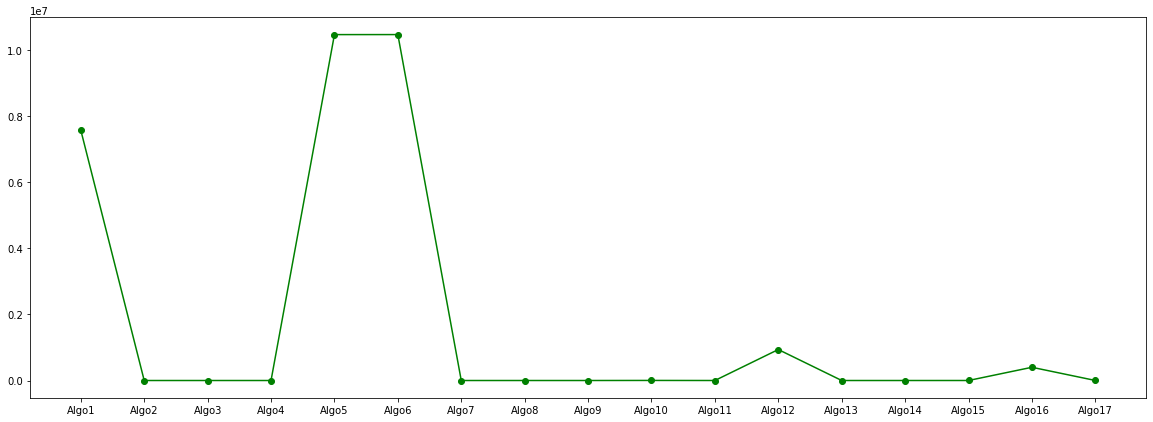

In [207]:
plt.rcParams["figure.figsize"] = (20,7)
plt.plot(F_means ,'go-' )

In [209]:
fraidDf=pd.DataFrame(columns=["Algo","Statistic","Pvalue","Result"])
fraidDf['Algo']=["Algo1","Algo2","Algo4","Algo5","Algo6","Algo7","Algo8","Algo9","Algo10","Algo11","Algo12",
                 "Algo13","Algo14","Algo15","Algo16","Algo17"]

fraidDf['Statistic']=st
fraidDf['Pvalue']=pv
fraidDf['Result']=result


fraidDf

,Algo,Statistic,Pvalue,Result
0,Algo1,19.466667,5.927438e-05,reject H0
1,Algo2,22.576271,1.252060e-05,reject H0
2,Algo4,38.400000,4.587182e-09,reject H0
3,Algo5,18.200000,1.116658e-04,reject H0
4,Algo6,20.266667,3.973281e-05,reject H0
5,Algo7,16.800000,2.248673e-04,reject H0
6,Algo8,25.220339,3.337897e-06,reject H0
7,Algo9,25.266667,3.261467e-06,reject H0
8,Algo10,24.200000,5.559513e-06,reject H0
9,Algo11,22.866667,1.082845e-05,reject H0


# Wilcoxon  test

In [212]:
ws=[]
wp=[]
wilcxR=[]
j=0
ourbest = 3
for i in range(17):
  j+=1
  if(j==3):
    continue
  s1, p1 = wilcoxon(F_DF['Algo'+str(j)],F_DF['Algo'+str(ourbest)])
  if p1 > alpha:
    wilcxR.append("fail to reject H0")
  else:
    wilcxR.append("reject H0")
  

  ws.append(s1)
  wp.append(p1)
minPWil = min(wp)
minPWil

0.001832579947170524

In [221]:
wRankDf=pd.DataFrame(columns=["Algo","Statistic","Pvalue",])
wRankDf['Algo']=["Algo1","Algo2","Algo4","Algo5","Algo6","Algo7","Algo8","Algo9","Algo10","Algo11","Algo12",
                 "Algo13","Algo14","Algo15","Algo16","Algo17"]

diff = []
for p in pv :
  diff.append( minPWil - p)
#print(diff.Ranking)
wRankDf['Diff from ' + str(minPWil)]= diff
wRankDf['Statistic']=ws
wRankDf['Pvalue']=wp
wRankDf['Ranking']=wRankDf['Pvalue'].rank()


wRankDf

,Algo,Statistic,Pvalue,Diff from 0.001832579947170524,Ranking
0,Algo1,81.0,0.001833,0.001773,1.0
1,Algo2,214.0,0.703564,0.001820,13.0
2,Algo4,198.0,0.909351,0.001833,16.0
3,Algo5,91.0,0.003609,0.001721,3.0
4,Algo6,84.0,0.002255,0.001793,2.0
5,Algo7,212.0,0.905333,0.001608,15.0
6,Algo8,191.0,0.784656,0.001829,14.0
7,Algo9,211.0,0.658331,0.001829,12.0
8,Algo10,94.0,0.004390,0.001827,4.0
9,Algo11,165.0,0.165027,0.001822,8.0


In [215]:
wilcoxDf=pd.DataFrame(columns=["Algo","Statistic","Pvalue","Result"])
wilcoxDf['Algo']=["Algo1","Algo2","Algo4","Algo5","Algo6","Algo7","Algo8","Algo9","Algo10","Algo11","Algo12",
                 "Algo13","Algo14","Algo15","Algo16","Algo17"]
wilcoxDf['Pvalue']=wp
wilcoxDf['Statistic']=ws
wilcoxDf['Result']=wilcxR

wilcoxDf

,Algo,Statistic,Pvalue,Result
0,Algo1,81.0,0.001833,reject H0
1,Algo2,214.0,0.703564,fail to reject H0
2,Algo4,198.0,0.909351,fail to reject H0
3,Algo5,91.0,0.003609,reject H0
4,Algo6,84.0,0.002255,reject H0
5,Algo7,212.0,0.905333,fail to reject H0
6,Algo8,191.0,0.784656,fail to reject H0
7,Algo9,211.0,0.658331,fail to reject H0
8,Algo10,94.0,0.004390,reject H0
9,Algo11,165.0,0.165027,fail to reject H0


In [222]:
wilcoxDf.rank()

,Algo,Statistic,Pvalue,Result
0,1.0,1.0,1.0,13.0
1,10.0,16.0,13.0,5.0
2,11.0,12.0,16.0,5.0
3,12.0,3.0,3.0,13.0
4,13.0,2.0,2.0,13.0
5,14.0,15.0,15.0,5.0
6,15.0,11.0,14.0,5.0
7,16.0,14.0,12.0,5.0
8,2.0,4.0,4.0,13.0
9,3.0,8.0,8.0,5.0


# adjusted p-values

In [223]:
pv.sort()
rank=1
len_pv=len(pv)
p_adj_list=[]
p_val=[]
for p in pv:
  fdr_adj_p_val=p*len_pv/rank
  rank+=1
  p_adj_list.append(fdr_adj_p_val)
  p_val.append(p)


In [224]:
adjDF=pd.DataFrame(columns=["Raw p_value","Adjusted p_value"])
adjDF['Raw p_value']=p_val
adjDF['Adjusted p_value']=p_adj_list
adjDF

,Raw p_value,Adjusted p_value
0,4.587182e-09,7.339491e-08
1,3.226645e-06,2.581316e-05
2,3.261467e-06,1.739449e-05
3,3.337897e-06,1.335159e-05
4,5.559513e-06,1.779044e-05
5,6.969622e-06,1.858566e-05
6,8.865588e-06,2.026420e-05
7,1.082845e-05,2.165691e-05
8,1.252060e-05,2.225884e-05
9,1.845823e-05,2.953317e-05


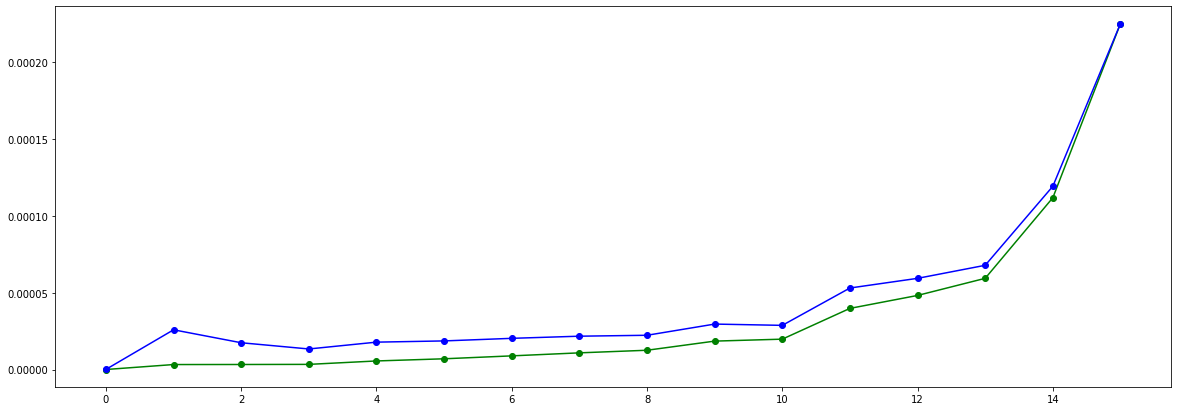

In [225]:
plt.rcParams["figure.figsize"] = (20,7)

plt.plot(adjDF['Raw p_value'] ,'go-' )
plt.plot(adjDF['Adjusted p_value'] ,'bo-' )

In [226]:
wp.sort()
rank=1
len_pv=len(wp)
wp_adj_list=[]
wp_val=[]
for i in wp:
  fdr_adj_p_val=i*len_pv/rank
  rank+=1
  wp_adj_list.append(fdr_adj_p_val)
  wp_val.append(i)

In [227]:
x = pd.DataFrame(columns=["Raw p_value","Adjusted p_value"])
x['Raw p_value']=wp_val
x['Adjusted p_value']=wp_adj_list
x

,Raw p_value,Adjusted p_value
0,0.001833,0.029321
1,0.002255,0.018041
2,0.003609,0.019250
3,0.004390,0.017558
4,0.005320,0.017023
5,0.005667,0.015112
6,0.047162,0.107798
7,0.165027,0.330053
8,0.298944,0.531456
9,0.328571,0.525714


# 5 Test

In [228]:
m=F_means.values
holm=smt.multipletests(pv,alpha=alpha,method='holm')
holm

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 array([7.33949079e-08, 4.83996684e-05, 4.83996684e-05, 4.83996684e-05,
        6.67141589e-05, 7.66658410e-05, 8.86558764e-05, 9.74560787e-05,
        1.00164768e-04, 1.29207638e-04, 1.29207638e-04, 1.98664036e-04,
        1.98664036e-04, 1.98664036e-04, 2.23331617e-04, 2.24867324e-04]),
 0.0032006977101884937,
 0.003125)

In [229]:
bonf = smt.multipletests(pv,alpha=alpha,method='bonferroni')
bonf

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 array([7.33949079e-08, 5.16263130e-05, 5.21834788e-05, 5.34063573e-05,
        8.89522119e-05, 1.11513951e-04, 1.41849402e-04, 1.73255251e-04,
        2.00329535e-04, 2.95331744e-04, 3.15691650e-04, 6.35724915e-04,
        7.70409976e-04, 9.48390130e-04, 1.78665294e-03, 3.59787719e-03]),
 0.0032006977101884937,
 0.003125)

In [230]:
fdr = smt.multipletests(pv,alpha=alpha,method='fdr_bh')
fdr

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 array([7.33949079e-08, 1.33515893e-05, 1.33515893e-05, 1.33515893e-05,
        1.77904424e-05, 1.85856584e-05, 2.02642003e-05, 2.16569064e-05,
        2.22588373e-05, 2.86992409e-05, 2.86992409e-05, 5.29770763e-05,
        5.92623059e-05, 6.77421521e-05, 1.19110196e-04, 2.24867324e-04]),
 0.0032006977101884937,
 0.003125)

In [231]:
hommel= smt.multipletests(pv,alpha=alpha,method='hommel')
hommel

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 array([7.33949079e-08, 3.44316389e-05, 3.44316389e-05, 3.44316389e-05,
        4.44761059e-05, 5.26152750e-05, 6.20591135e-05, 6.90575485e-05,
        7.51235757e-05, 9.22911700e-05, 9.86536407e-05, 1.19198422e-04,
        1.44451871e-04, 1.67498713e-04, 2.23331617e-04, 2.24867324e-04]),
 0.0032006977101884937,
 0.003125)

In [232]:
nemeny = sp.posthoc_nemenyi(fraidDf,val_col='Pvalue',group_col='Result', sort=True)
nemeny

,reject H0
reject H0,1.0


In [237]:
df = pd.DataFrame(columns=[holm ,bonf ,fdr ,hommel])
